In [1]:
%run Latex_macros.ipynb

<IPython.core.display.Latex object>

In [2]:
# My standard magic !  You will see this in almost all my notebooks.

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Reload all modules imported with %aimport
%load_ext autoreload
%autoreload 1

%matplotlib inline

In [3]:
import pandas as pd
import numpy as plt

import matplotlib.pyplot as plt

import os 

import cnn_helper
%aimport cnn_helper
cnnh = cnn_helper.CNN_Helper()

# Convolutional Neural Networks


A Fully Connected/Dense Layer with a single unit producing a single feature at layer $\ll$ computes
$$
\y_{\llp,1} = a_\llp( \y_{(\ll-1)} \cdot \W_{\llp,1} )
$$

<div>
    <br>
    <center><h3>Fully connected, single feature</h3></center>
    <br>
<img src=images/FC_1feature.png width="60%">
    <br>
    </div>

That is: 
- It recognizes one new synthetic feature
- In the entirety ("fully" connected) of $\y_{(\ll-1)}$
- Using pattern $\W_{\llp,1}$ (same size as $\y_{(\ll-1)}$)
- To reduce $\y_{(\ll-1)}$ to a single feature.

The pattern being matched spans the entirety of the input
- Might it be useful to recognize a smaller feature that spanned only *part* of the input ?
- What if this smaller feature could occur *anywhere* in the input rather than at a fixed location ?

For example
- A "spike" in a time series
- The eye in a face

A pattern whose length was that of the entire input could recognize the smaller feature only in a *specific* place

This motivates some of the key ideas behind a Convolutional Layer.
- Recognize smaller features within the whole
- Using small patterns
- That are "slid" over the entire input
- Localizing the specific part of the input containing the smaller feature

Here is the connectivity diagram of a Convolutional Layer producing a **single** feature  at layer $\ll$
- Using a pattern of length $3$
- Eventually we will show how to produce *multiple* features
- Hence the subscript "1" in $\y_{\llp,1}$ to denote the first output feature
- The output $\y_{\llp,1}$ is called a *feature map* as it attempts to match a feature at each input location

<div>
    <br>
    <center><h3>Convolutional layer, single feature</h3></center>
    <br>
<img src=images/Conv1d_1feature_diag.png width="30%">
    <br>
    </div>

The important differences of a Convolutional Layer from a Fully Connected Layer:

- Produces a new *single* feature *for each location* in $\y_{(\ll-1)}$

- $\y_{\llp,1}$ is thus a *vector* (first feature map) of the same length as $\y_{(\ll-1)}$
- $\y_\llp$ is a vector of $n_\llp$ feature maps, one feature map per output feature
- The output feature at location $j$ is **not** fully connected to $\y_{(\ll-1)}$
    - Only a subsequence of $\y_{(\ll-1)}$
   

The lack of full connectivity is significant.

In a Fully Connected network the relationship between
-  Feature $j$ and features $(j-1), (j+1)$
- Is no more significant than the relationship between feature $j$ and feature $k \gg j$

That is: spatial locality does not matter.
    

To see the lack of relationship:

Let $\text{perm}$ be a random ordering of the integers in the range $[1 \ldots n]$.

Then
- $\x[ \text{perm} ]$ is a permutation of input $\x$
- $\Theta[ \text{perm} ]$ is the corresponding permutation of parameters $\Theta$.

$$
\Theta^T \cdot \x =  \Theta[ \text{perm} ]^T \cdot \x[ \text{perm} ] ]
$$

But for certain types of inputs (e.g. images) it is easy to imagine that spatial locality is important.

By using a small pattern (and restricting connectivity), we emphasize the importance of neighboring features over far way features.

Mathematically, the One Dimensional Convolutional Layer (Conv1d) we have shown computes $\y_\llp$

$$
\y_{\llp,1} = 
\begin{pmatrix}
a_\llp \left( \; N(\y_{(\ll-1)}, \W_{\llp,1}, 1) \cdot \W_{\llp,1} \; \right) \\
a_\llp \left( \; N(\y_{(\ll-1)}, \W_{\llp,1}, 2) \cdot \W_{\llp,1} \; \right) \\
\vdots \\
a_\llp \left( \; N(\y_{(\ll-1)}, \W_{\llp,1}, n_{(\ll-1)} \cdot \W_{\llp,1} \; \right) \\
\end{pmatrix}
$$

where
$N( \; \y_{(\ll-1)}, \W_{\llp,1}, j \; )$
- selects a subsequence of $\y_{(\ll-1)}$ centered at $\y_{(\ll-1),j}$

Note that
- The *same* weight matrix $\W_{\llp,1}$ is used for the first feature at *all*locations $j$
- The size of $\W_{\llp,1}$ is the same as the size of the subsequence $N( \; \y_{(\ll-1)}, \W_{\llp,1}, j )$
    - Since dot product is element-wise multiplication

So $\W_{\llp,1}$
- Is a smaller pattern
- That is applied to *each* location $j$ in $\y_{(\ll-1)}$
- $\y_{\llp,1,j}$ recognizes the match/non-match of the smaller first feature at $\y_{(\ll-1),j}$

$\W_{\llp,1}$ is called a convolutional *filter* or *kernel*
- We will often denote it $\kernel_{\llp, 1}$
- But it is just a part of the weights $\W$ of the multi-layer NN.
- We use $f_\llp$ to denote the size of the smaller pattern called the *filter size*
  

**Note**

The default activation $a_\llp$ in Keras is "linear"
- That is: it returns the dot product input unchanged
- Always know what is the default activation for a layer; better yet: always specify !

A *Convolution* is often depicted as
- A filter/kernel
- That is slid over each location in the input
- Producing a corresponding output for that location

Here's a picture with a kernel of size $f_\llp = 3$


<div><br>
    <center><h3>Conv 1D, single feature: sliding the filter</h3></center>
    <br>
<img src=images/W9_L1_S19_Conv1d_sliding.png width="80%">
    <!-- edX: Original: <img src="images/Conv1d_sliding.png"> replace by EdX created image --> 
</div>

After sliding the Kernel over the whole $\y_{(\ll-1)}$ we get:

<div>
    <br>
    <center><h3>Conv 1D, single feature</h3></center>
    <br>
<img src=images/W9_L1_S22_Conv1d.png width="80%">
    <!-- edX: Original: <img src="images/Conv1d.png"> replace by EdX created image --> 
    </div>

Element $j$ of output $\y_{\llp.1}$ (i.e., $\y_{\llp,1,j}$)
- Is colored (e.g., $j=1$ is colored Red)
- Is computed by applying the *same* $\W_{\llp,1}$ to 
    - The $f_\llp$ elements of $\y_{(\ll-1)}$, centered at $\y_{(\ll-1),j}$
    - Which have the same color as the output

Note however that,  at the "ends" of $\y_{(\ll-1)}$
the kernel
may extend beyond the input vector.

In that case $\y_{(\ll-1)}$ may be extended with *padding* (elements with $0$ value typically)

# Conv2d in action

Pre-Deep Learning: manually specified filters have a rich history for image recognition.

Here is a list of manually constructed kernels (templates) that have proven useful
- [list of filter matrices](https://en.wikipedia.org/wiki/Kernel_(image_processing))

Let's see some in action to get a better intuition.

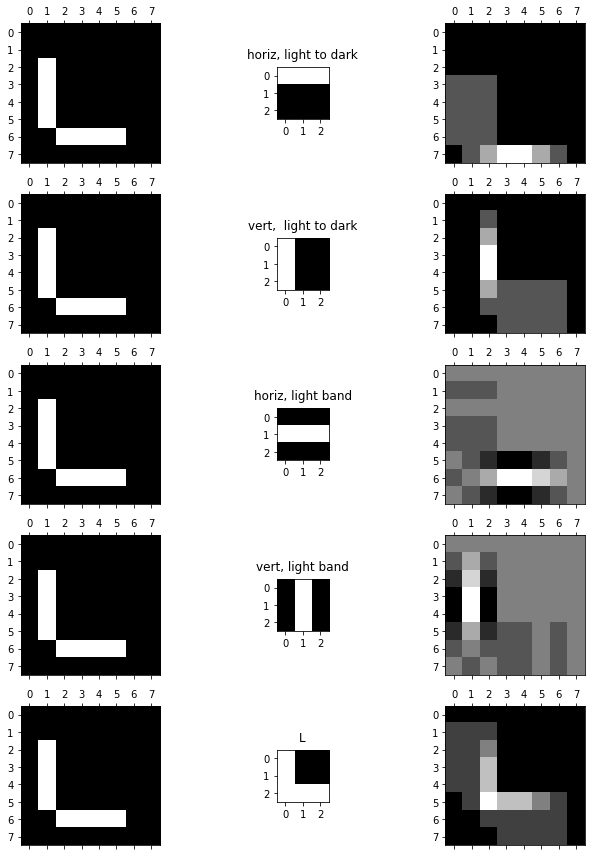

In [4]:
_= cnnh.plot_convs()

- A bright element in the output indicates a high, positive dot product
- A dark element in the output indicates a low (or highly negative) dot product

In our example
- $N = 2$: Two spatial dimensions
- One input feature: $n_{(\ll-1)} = 1$ 
- One output feature $n_\llp = 1$
- $f_\llp = 3$
    - Kernel is $(3 \times 3 \times 1)$.

The template match will be maximized when
- high values in the input correspond to high values in the matching location of the template
- low values in the input correspond to low values in the matching locations of the template

In [5]:
print("Done")

Done
